## 문제정의

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import mglearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

## 데이터 수집

In [36]:
data = pd.read_csv('fish.csv',encoding = 'UTF-8')

In [37]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


species = 종류
weight = 무게
length1 = 세로길이
length2 = 대각선길이
length3 = 가로길이
height= 길이
width = 넓이

## 데이터 전처리

In [38]:
data.isnull().sum()
#결측치 확인

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

## 탐색적 분석

In [39]:
data.keys()

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [41]:
data.describe()
#통계 수치

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [42]:
data.duplicated().sum()
#중복 데이터 확인

0

In [43]:
data.corr()
#상관관계


,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


### 데이터 시각화

<AxesSubplot:>

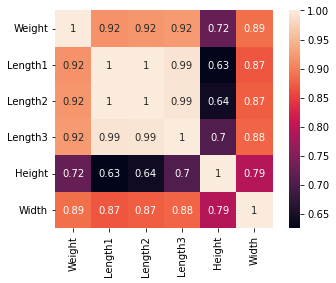

In [44]:
sns.heatmap(data=data.corr(),square=True,annot=True,cbar=True)

Length1과 Length2가 동일

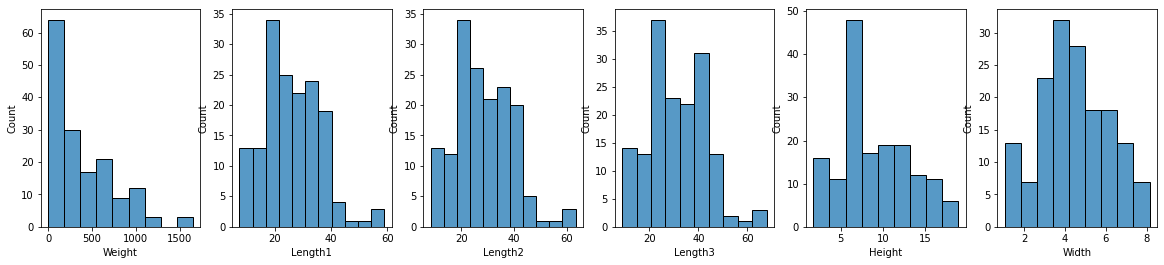

In [74]:
fig,ax = plt.subplots(ncols=6,figsize=(20,4))

variables=data.columns[1:]

for i,var in enumerate(variables):
    sns.histplot(data=data,x=var,ax=ax[i])
plt.show()

In [45]:
data['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [75]:
bream=data[data['Species']=='Bream']

In [76]:
bream_weight=bream['Weight'].values
bream_Length=bream['Length2'].values

In [77]:
bream_weight

array([ 242.,  290.,  340.,  363.,  430.,  450.,  500.,  390.,  450.,
        500.,  475.,  500.,  500.,  340.,  600.,  600.,  700.,  700.,
        610.,  650.,  575.,  685.,  620.,  680.,  700.,  725.,  720.,
        714.,  850., 1000.,  920.,  955.,  925.,  975.,  950.])

In [78]:
bream_Length

array([25.4, 26.3, 26.5, 29. , 29. , 29.7, 29.7, 30. , 30. , 30.7, 31. ,
       31. , 31.5, 32. , 32. , 32. , 33. , 33. , 33.5, 33.5, 34. , 34. ,
       34.5, 35. , 35. , 35. , 35. , 36. , 36. , 37. , 38.5, 38.5, 39.5,
       41. , 41. ])

In [79]:
smelt=data[data['Species']=='Smelt']

In [80]:
smelt_weight=smelt['Weight'].values
smelt_Length=smelt['Length2'].values

In [81]:
smelt_weight

array([ 6.7,  7.5,  7. ,  9.7,  9.8,  8.7, 10. ,  9.9,  9.8, 12.2, 13.4,
       12.2, 19.7, 19.9])

In [82]:
smelt_Length

array([ 9.8, 10.5, 10.6, 11. , 11.2, 11.3, 11.8, 11.8, 12. , 12.2, 12.4,
       13. , 14.3, 15. ])

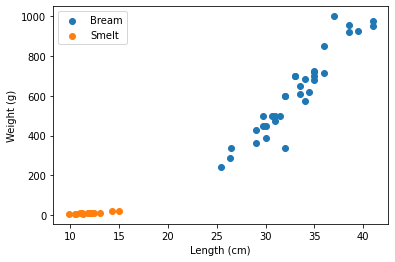

In [100]:
plt.scatter(bream_Length,bream_weight,label="Bream")
plt.scatter(smelt_Length,smelt_weight,label="Smelt")
plt.legend()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

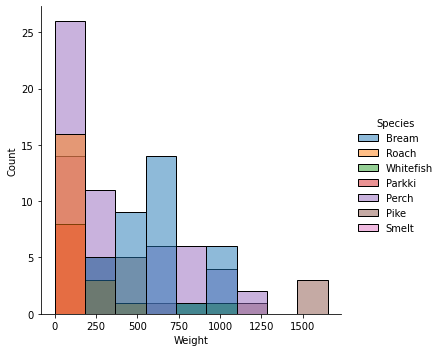

In [46]:
sns.displot(x='Weight',hue='Species',kind='hist',data=data)

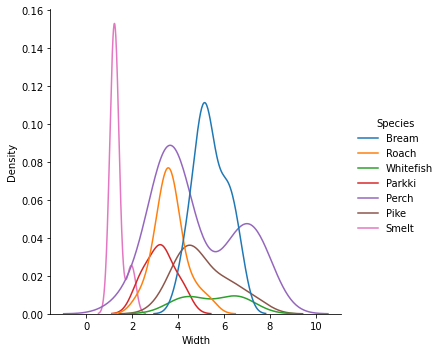

In [31]:
sns.displot(x='Width',hue='Species',kind='kde',data=data)
#클래스를 군집되는 데이터로 나누어서 이질적이지 않게 하나의 봉우리로 나옴

### 데이터 프레임 변환

In [101]:
bream_data = np.c_[bream_weight,bream_Length]

In [102]:
smelt_data = np.c_[smelt_weight,smelt_Length]

In [103]:
num_bream = len(bream_data)
num_smelt = len(smelt_data)

In [106]:
data_label = np.array([1] * num_bream + [0] * num_smelt)
data_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [107]:
fish_data = np.r_[bream_data,smelt_data]
len(fish_data)

49

### 데이터셋 분할

In [109]:
x=fish_data
y=data_label

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3
                                                 ,shuffle=True,random_state=0)

## 모델 정의

In [128]:
knn = KNeighborsClassifier(n_neighbors=3)

## 모델학습

In [129]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## 모델 예측


In [130]:
pred = knn.predict(x_test)
pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0])

## 모델 평가 

In [127]:
knn.score(x_test,y_test)

1.0

In [131]:
from sklearn.metrics import accuracy_score

In [132]:
acc = accuracy_score(y_test,pred)
acc

1.0